# COMPSCI 371 Homework 7

_**Group Members:**_ Jai Kasera, Mayur Sekhar, Rithvik Neti 

### Problem 0 (3 points)

## Part 1: Decision Tree Basics

### Problem 1.1

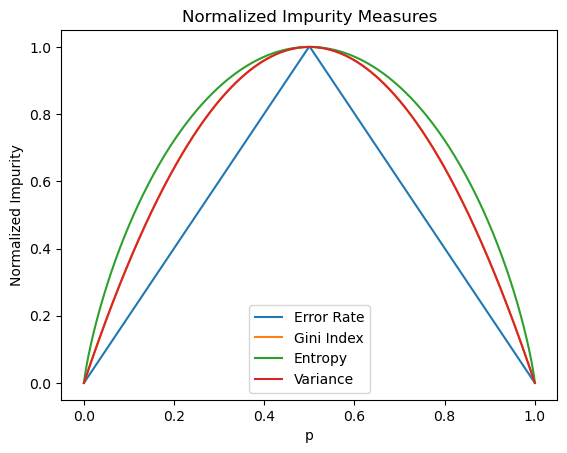

In [2]:
import numpy as np 
from matplotlib import pyplot as plt 

p = np.linspace(0, 1, 500)
q = 1 - p

error = 1-np.maximum(p,q) 
gini = 1- p**2 - q**2 
entropy = -p * np.log2(p, where=(p != 0)) - q * np.log2(q, where=(q != 0))

m = 1*p + 2*q 
variance = ((1-m)**2)*p + ((2-m)**2)*q

error /= np.max(error)
gini /= np.max(gini)
entropy /= np.max(entropy)
variance /= np.max(variance)

plt.plot(p, error, label="Error Rate")
plt.plot(p, gini, label="Gini Index")
plt.plot(p, entropy, label="Entropy")
plt.plot(p, variance, label="Variance")
plt.xlabel("p")
plt.ylabel("Normalized Impurity")
plt.title("Normalized Impurity Measures")
plt.legend()



### Problem 1.2 (Exam Style)

The plot for normalized variance and normalized ini index are identical. 

This means we want to show mathematically that the normalized variance equals the normalized variance. First, let us simplify variance 

$\sum_{k\in Y}(k-m)^2p^2_k$. Using the fact that $q=p_1$ and $p=p_2$,

$\sum_{k\in Y}(k-m)^2p^2_k = (1-m)^2*q + (2-m)^2*p$

$m=\sum_{k\in Y}k*p_k = q+2p = 1-p+2p = 1+p$ since $p+q=1$. Using this substitution, the above expression becomes:

$(1-1-p)^2*(1-p) + (2-1-p)^2*p = (-p)^2 + (1-p)^2*(1-p) = p^2*(1-p) + (1-p)^2*p = p(1-p)(p+1-p) = p(1-p)(1) = p(1-p)$

Thus we have shown the variance = $p(1-p)$ 

The gini index = $1-p^2-q^2 = 1-p^2 - (1-p)^2 = (1-p)(1+p - 1 + p) = (1-p)(2p)$

Now we need to show the normalized gini index = normalized variance. 

Normalized gini index = $\frac{(1-p)(2p)}{\sum_{p\in[0,1]}i(S)}$ and normalized variance = $\frac{(1-p)(p)}{\sum_{p\in[0,1]}i(S)}$. At the maximum of I(S) which is at p=1/2, gini index = 0.5 and variance = 0.25. Thus, we get:

normalized gini index = $\frac{(1-p)(2p)}{0.5} = (1-p)(4p)$

normalized variance = $\frac{(1-p)(p)}{0.25} = (1-p)(4p)$

Thus, we have shown mathematically that the normalized gini index is identical to the normalized variance for K=2, which is why the plots above are identical.

### Problem 1.3 (Exam Style)

1. $h((2,5)) = 3$

2. $P(h((2.5)) is wrong) = 1-0.8 = 0.2$

3. $1-0.6^2 - 0.1^2 - 0.3^2 = 0.54$

4. $1-0.6 = 0.4$


### Problem 1.4 (Exam Style)

Impurity I(S) of entire set S is $I(S) = 1- (0.5)^2 - (0.25)^2 - (0.25)^2 = 5/8$ because $|S|=4$, and $|Y_1| = 1$, $|Y_2| = 2$, and $|Y_3| = 1$

$$
i(S) = 5/8
$$

$$
\begin{array}{}
j & t & |L| & i_L & |R| & i_R & \delta &\text{best} \\\hline
1 & 3 & 1 & 0 & 3 & 4/9 & 7/24 & no \\
1 & 5 & 2 & 1/2 & 2 & 1/2 & 1/8 & no \\
1 & 7 & 3 & 2/3 & 1 & 0 & 1/8 & no \\
2 & 2 & 1 & 0 & 3 & 4/9 & 7/24 & no\\
2 & 4 & 2 & 1/2 & 2 & 0 & 3/8 &  yes \\
2 & 6 & 3 & 2/3 & 1 & 0 & 1/8 & no \\

\end{array}
$$

## Part 2: Decision Trees as Partitions

In [3]:
import pickle
import numpy as np
from types import SimpleNamespace
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
from matplotlib.patches import Rectangle
%matplotlib inline

In [4]:
def bounding_box(xs, margin=0.5):
    mn, mx = np.min(xs, axis=0) - margin, np.max(xs, axis=0) + margin
    return SimpleNamespace(left=mn[0], right=mx[0], bottom=mn[1], top=mx[1])


def shade_box(box, color, alpha=0.2):
    pale_color = color.copy()
    pale_color[3] = alpha
    corner = box.left, box.bottom
    width, height = box.right - corner[0], box.top - corner[1]
    rectangle = Rectangle(corner, width, height,
                          edgecolor='none', facecolor=pale_color)
    plt.gca().add_patch(rectangle)

In [5]:
import urllib.request
import ssl
from os import path as osp
import shutil


def retrieve(file_name, semester='fall24', homework=7):
    if osp.exists(file_name):
        print('Using previously downloaded file {}'.format(file_name))
    else:
        context = ssl._create_unverified_context()
        fmt = 'https://www2.cs.duke.edu/courses/{}/compsci371/homework/{}/{}'
        url = fmt.format(semester, homework, file_name)
        with urllib.request.urlopen(url, context=context) as response:
            with open(file_name, 'wb') as file:
                shutil.copyfileobj(response, file)
        print('Downloaded file {}'.format(file_name))

In [6]:
def plot_data(data):
    box = bounding_box(data.x)
    plt.figure(figsize=(10, 10), tight_layout=True)
    plt.plot((box.left, box.right, box.right, box.left, box.left),
             (box.bottom, box.bottom, box.top, box.top, box.bottom), 'k')
    colormap = ListedColormap(cm.tab10(range(len(np.unique(data.y)))))
    plt.scatter(data.x[:, 0], data.x[:, 1], s=80, c=data.y, cmap=colormap)
    plt.axis('equal')
    plt.axis('off')
    return box, colormap.colors

Downloaded file small_set.pickle


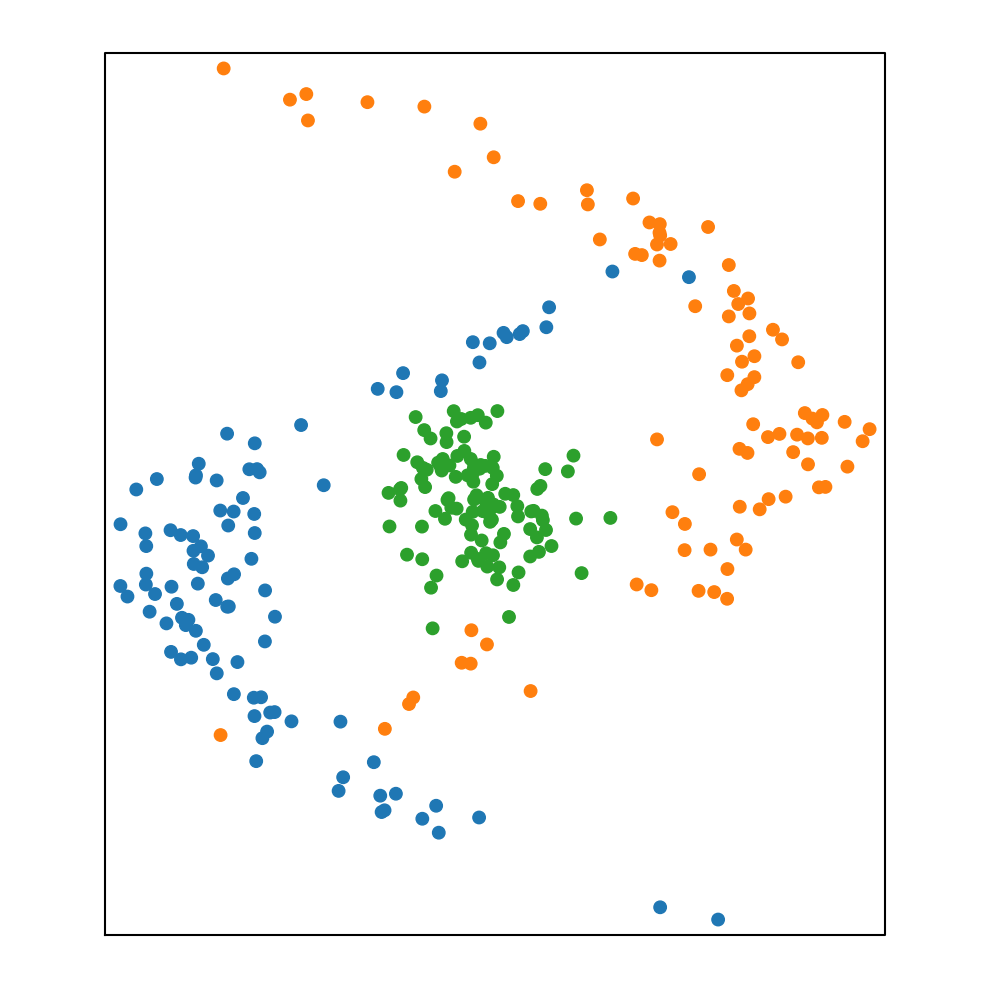

In [7]:
small_set_name = 'small_set.pickle'
retrieve(small_set_name)
with open(small_set_name, 'rb') as file:
    small_set = pickle.load(file)
plot_data(small_set)
plt.show()

### Problem 2.1

In [8]:
from copy import copy


def replace_side(box, side, value):
    new = dict(**box.__dict__)
    new[side] = value
    return SimpleNamespace(**new)

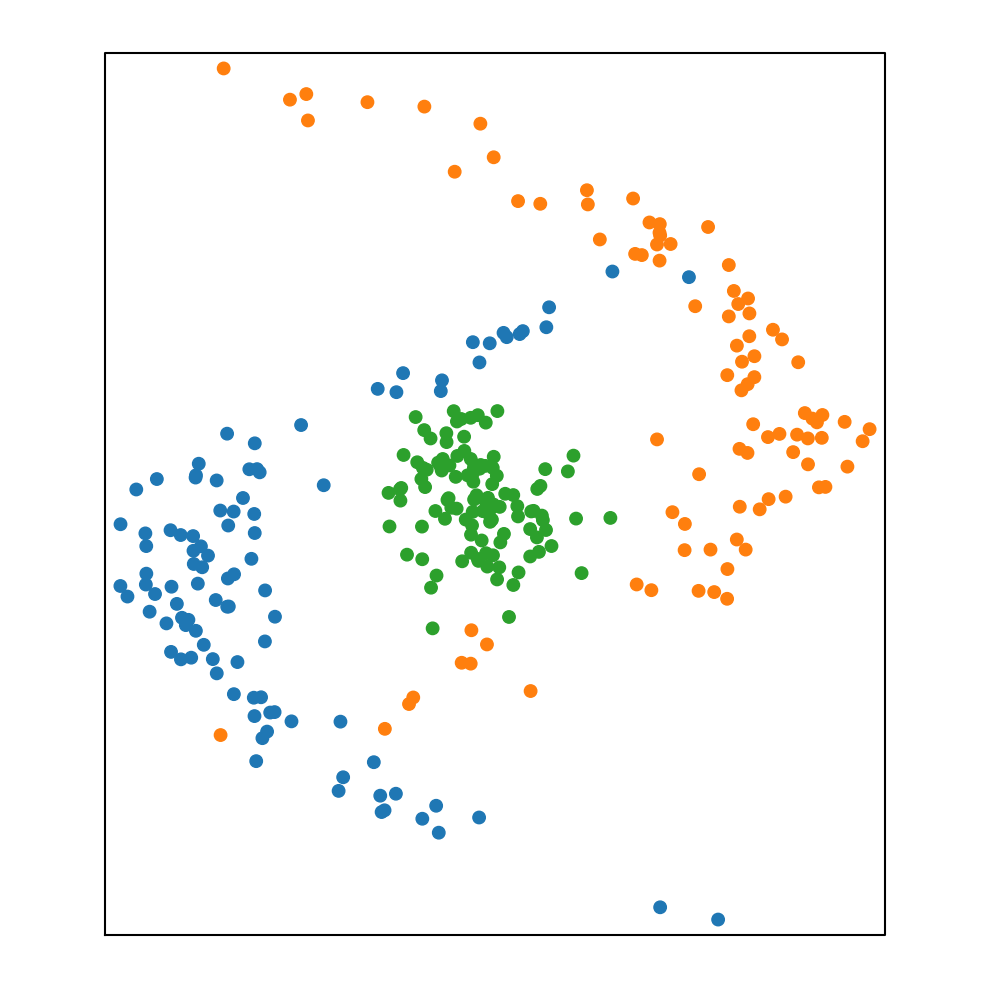

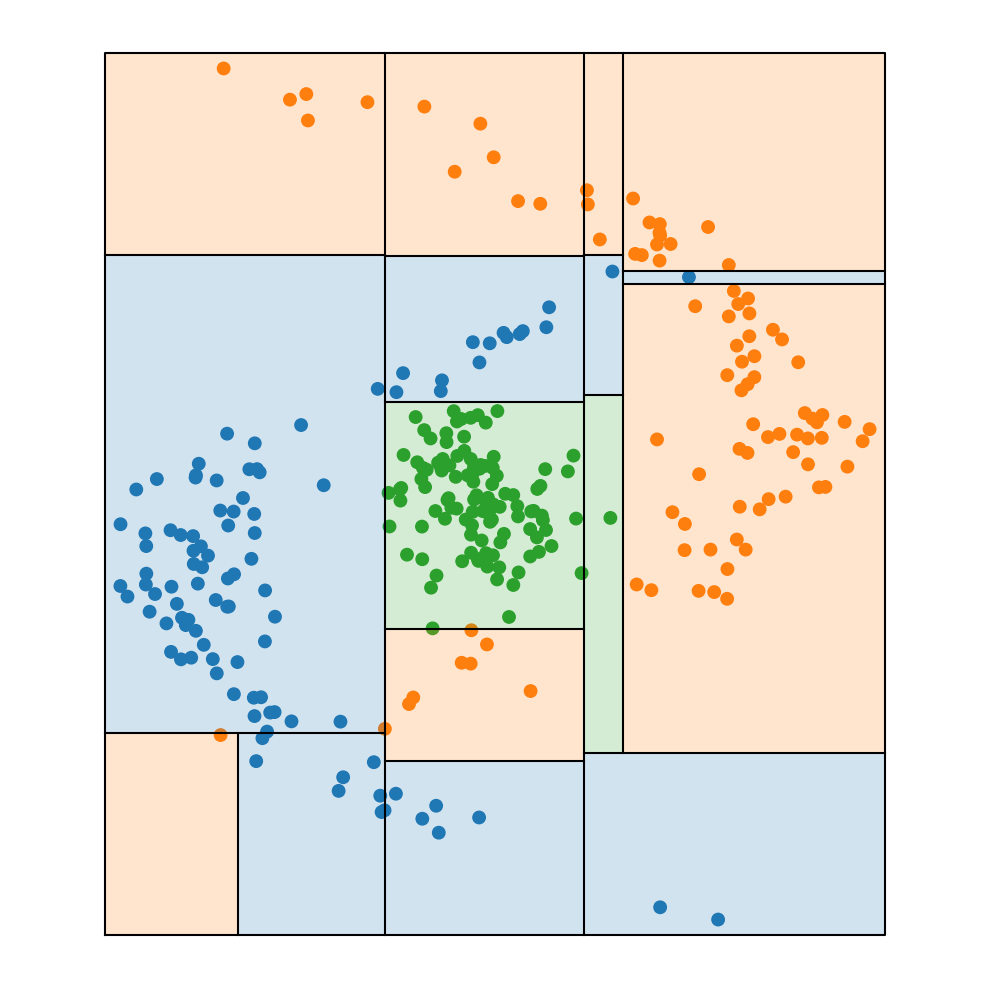

In [10]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from types import SimpleNamespace

h = DecisionTreeClassifier().fit(small_set.x, small_set.y)
t = h.tree_

def draw_tree(t, b, colors):
    bx, class_colors = plot_data(small_set)
    def draw(node, box):
        if t.children_left[node] == -1 and t.children_right[node] == -1:
            label = np.argmax(t.value[node])
            shade_box(box, colors[label])
        else:
            feature = t.feature[node]
            threshold = t.threshold[node]
            if feature == 0: 
                left_box = replace_side(box, 'right', threshold)
                right_box = replace_side(box, 'left', threshold)
                plt.plot([threshold, threshold], [box.bottom, box.top], 'k-')
            else:
                left_box = replace_side(box, 'top', threshold)
                right_box = replace_side(box, 'bottom', threshold)
                plt.plot([box.left, box.right], [threshold, threshold], 'k-')
            draw(t.children_left[node], left_box)
            draw(t.children_right[node], right_box)

    draw(0, b)

bx, class_colors = plot_data(small_set)
draw_tree(t, bx, class_colors)
plt.show()

### Problem 2.2 (Exam Style)
Overfitting in decision trees typically appears when the tree segments data into very small regions, leading to overly complex boundaries. In this visualization, areas where the tree makes very narrow splits or repeatedly divides small sections could indicate potential overfitting, as these may not generalize well beyond the training set.

## Part 3: Trees and Forests 

In [32]:
import contextlib
import os
from torchvision.datasets import MNIST
from sklearn.preprocessing import StandardScaler

In [33]:
def standardize(data, stats=None):
    if stats is None:
        scaler = StandardScaler().fit(data)
        data = scaler.transform(data).astype(np.float32)
        return data, {'mean': scaler.mean_, 'std': scaler.scale_}
    else:
        data -= stats['mean']
        data /= stats['std']
        return data

In [34]:
def load_mnist():
    print('loading the MNIST dataset...', end=' ')
    data = {}
    for which in ('train', 'test'):
        is_train = True if which == 'train' else False
        with (open(os.devnull, 'w') as f,
              contextlib.redirect_stderr(f),
              contextlib.redirect_stdout(f)):
            d = MNIST('.', train=is_train, download=True)
        ds = SimpleNamespace(
            Y=list(range(10)), x=d.data.numpy(), y=d.targets.numpy())
        n, shape = ds.x.shape[0], ds.x.shape[1:]
        ds.x = ds.x.reshape((n, -1)).astype(np.float32)
        ds.y = ds.y.astype(np.uint8)
        data[which] = ds

    data['train'].x, stats = standardize(data['train'].x)
    stats['max'], stats['shape'] = np.max(data['train'].x), shape
    data['test'].x = standardize(data['test'].x, stats)
    print('done')

    return SimpleNamespace(**data), SimpleNamespace(**stats)

In [35]:
def x_to_image(x, stats):
    x = np.round(x * stats.std + stats.mean)
    x = np.clip(x * 255. / stats.max, 0., 255.).astype(np.uint8)
    return np.reshape(x, stats.shape)


def show_random_training_images(data, stats, rows=3, columns=6):
    xs, ys = data.train.x, data.train.y
    rng = np.random.default_rng()
    indices = rng.integers(low=0, high=len(ys), size=rows * columns)
    plt.figure(figsize=(2 * columns, 2.1 * rows), tight_layout=True)
    for plot, index in enumerate(indices):
        image = x_to_image(xs[index], stats)
        plt.subplot(rows, columns, plot + 1)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        plt.title(ys[index], fontsize=18)
    plt.show()

In [36]:
digits, image_stats = load_mnist()

loading the MNIST dataset... done


### Problem 3.1

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

def train_tree(dt): 
    
    dt.fit(digits.train.x, digits.train.y)
    y_train_pred = dt.predict(digits.train.x)
    y_test_pred = dt.predict(digits.test.x)

    train_error = 100 * (1 - accuracy_score(digits.train.y, y_train_pred))
    test_error = 100 * (1 - accuracy_score(digits.test.y, y_test_pred))

    print(f"Training error rate: {train_error:.3f} percent")
    print(f"Test error rate: {test_error:.3f} percent")
    cm = confusion_matrix(digits.test.y, y_test_pred)
    print("Confusion Matrix (for test data):")
    print(cm)
    return dt

train_tree(DecisionTreeClassifier(random_state = 30)) 



Training error rate: 0.000 percent
Test error rate: 12.160 percent
Confusion Matrix (for test data):
[[ 913    1    8    7    4   10   14    7   10    6]
 [   1 1093    8    6    2    4    7    2   10    2]
 [  16    8  890   29   12   10   12   25   21    9]
 [   7    5   33  863    7   41    6    7   23   18]
 [   7    1    8    9  860    9   17   10   24   37]
 [  18    5    5   47    6  747   22    5   23   14]
 [  18    3   12    3   19   21  844    3   29    6]
 [   2   13   23   18    6    4    2  927    8   25]
 [  12    4   29   37   20   26   17   13  785   31]
 [  13    4   12   21   36   12    6   18   25  862]]


DecisionTreeClassifier(random_state=30)

### Problem 3.2 (Exam Style)

1. Digits 3 and 5, since the entry (3,5) in the confusion matrix is the largest non-diagonal entry in the matrix, which indicates there are 47 times in which the true digit should have been 3, but it was predicted to be 5.

2. No, the confusion is not always symmetric in the matrix. We can see that the value of (i,j) and (j,i) in the confusion matrix is not the same for all $(i,j) \in [0,9]$

3. The decision tree does not seem to underfit, because it has a perfect (0.000%) error rate on the training data, meaning it fits the training data perfectly. If the decision tree did underfit, that would mean that it does not fit to the training data effectively. The reason for this might be because the default hyperparameters for the sci-kit learn DecisionTree function have a large enough max_depth such that the tree is able to keep growing until it can reduce the impurity to 0. 

4. The decision tree does seem overfit the data, because the error rate on the test data (12.160%) is significantly higher than the 0% error rate on the training data. This indicates that the tree is very sensitive to new data because it is overfitted to the training data. This might be because we only used a single DecisionTree vs using a different method like a RandomForest, which could reduce overfitting and improve generalization.

### Problem 3.3

In [56]:
from sklearn.ensemble import RandomForestClassifier 

rf = RandomForestClassifier(n_estimators = 100, oob_score=True, random_state=25) 
train_tree(rf) 
print(f"Out-of-bag accuracy: {100*rf.oob_score_:.3f} percent")


Training error rate: 0.000 percent
Test error rate: 3.050 percent
Confusion Matrix (for test data):
[[ 971    0    0    0    0    2    3    1    2    1]
 [   0 1125    1    3    0    2    2    1    1    0]
 [   5    0  999    5    3    0    4    8    8    0]
 [   0    0    8  971    0    8    1   11   10    1]
 [   1    0    1    0  956    0    5    0    3   16]
 [   4    0    0   11    4  860    6    1    5    1]
 [   7    3    1    0    6    4  935    0    2    0]
 [   1    4   19    2    3    0    0  988    2    9]
 [   4    0    6    9    4    4    5    4  929    9]
 [   5    5    3   11   11    4    1    5    3  961]]
Out-of-bag accuracy: 96.608 percent


### Problem 3.4 (Exam Style)

1. The random forest does not seem to underfit, since it has a perfect error rate (0.000%) on the trining data. 

2. The random forest overfits less than the decision tree I found earlier in this dataset, since the test error for the random forest (3.050%) is less than the test error for the decision tree (12.160%). This means that the random forest has a better performance on unseen data, meaning that it is less overfit to the training data than the decision tree.

3. Yes, the out-of-bag error rate a reasonably accurate estimate of the test error rate. This is because it can be shown that the empirical risk from the out-of-bag estimate is an unbiased estimator of the random forest's statistical risk. This is partly because the set T' of all the samples that were left out of at least one bag, ends up being very close to the set T itself, and thus has very close to n samples. Because of this, the out-of-bag error rate is a reasonably accurate estimate of the test error rate.